#**Install Library**

In [32]:
!pip install basemap-data-hires
!pip install seaborn
!pip install basemap numpy pandas scipy
!pip install cartopy

#**Import Library**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import linregress
import datetime
from datetime import datetime
import seaborn as sns


#**Read Dataset**

In [34]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


In [35]:
# Membaca dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)

# Mengonversi kolom 'time' menjadi tipe datetime
df['time'] = pd.to_datetime(df['time'])

# Menerapkan filter untuk tahun 1966 - 2016
df_filtered = df[(df['time'].dt.year >= 1966) & (df['time'].dt.year <= 2016)]

# Menampilkan DataFrame yang telah difilter
df = df_filtered
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31 17:22:51.700000+00:00,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30 06:41:20.480000+00:00,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us
5,2016-12-30 06:06:34.030000+00:00,0.4049,123.7758,211.57,4.6,mb,NaN,55.0,1.753,0.77,...,2017-03-23T22:52:09.040Z,"23km W of Molibagu, Indonesia",earthquake,6.6,7.2,0.099,30.0,reviewed,us,us
6,2016-12-29 22:30:19.300000+00:00,-9.0279,118.6639,79.00,6.3,mww,NaN,26.0,3.553,1.42,...,2017-03-23T22:52:09.040Z,"29km S of Tolotangga, Indonesia",earthquake,6.2,1.8,NaN,NaN,reviewed,us,us
7,2016-12-29 14:37:33.160000+00:00,3.9723,126.7909,82.30,4.3,mb,NaN,177.0,3.230,0.83,...,2017-03-23T22:52:08.040Z,"216km SE of Sarangani, Philippines",earthquake,5.3,14.5,0.177,9.0,reviewed,us,us
8,2016-12-29 08:16:44.850000+00:00,-4.6133,101.7366,31.98,4.3,mb,NaN,112.0,1.241,0.62,...,2017-03-23T22:52:08.040Z,"107km SSW of Bengkulu, Indonesia",earthquake,5.2,6.8,0.147,13.0,reviewed,us,us
9,2016-12-29 01:22:26.280000+00:00,-4.7053,101.6970,31.82,4.3,mb,NaN,207.0,1.300,0.35,...,2017-03-23T22:52:08.040Z,"118km SSW of Bengkulu, Indonesia",earthquake,10.8,5.2,0.217,6.0,reviewed,us,us


In [36]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df = df_selected_columns
df.head(10)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,2016-12-31 17:22:51.700000+00:00,1.0439,126.5326,42.38,4.0,mb,us,us10007tyr,2017-03-23T22:52:11.040Z,earthquake,reviewed,us,us
1,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,us,us10007nv4,2017-03-23T22:52:10.040Z,earthquake,reviewed,us,us
2,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,us,us10007nqa,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
3,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,us,us10007npz,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
4,2016-12-30 06:41:20.480000+00:00,-9.1597,118.7325,105.58,4.4,mb,us,us10007tqx,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
5,2016-12-30 06:06:34.030000+00:00,0.4049,123.7758,211.57,4.6,mb,us,us10007npe,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
6,2016-12-29 22:30:19.300000+00:00,-9.0279,118.6639,79.00,6.3,mww,us,us10007nl0,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
7,2016-12-29 14:37:33.160000+00:00,3.9723,126.7909,82.30,4.3,mb,us,us10007tpb,2017-03-23T22:52:08.040Z,earthquake,reviewed,us,us
8,2016-12-29 08:16:44.850000+00:00,-4.6133,101.7366,31.98,4.3,mb,us,us10007tnz,2017-03-23T22:52:08.040Z,earthquake,reviewed,us,us
9,2016-12-29 01:22:26.280000+00:00,-4.7053,101.6970,31.82,4.3,mb,us,us10007tnc,2017-03-23T22:52:08.040Z,earthquake,reviewed,us,us


In [37]:
def bvalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return b*(-1)

def avalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return a

def generate_GR_Adeli_Panakkat_features(earthquake_dataset, time_window):
    earthquake_dataset['b-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=bvalue_OLS,raw = False).shift(1)
    earthquake_dataset['a-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=avalue_OLS,raw = False).shift(1)
    earthquake_dataset['Max magnitude expected'] = earthquake_dataset['a-value']/earthquake_dataset['b-value']

    return earthquake_dataset

In [38]:
indonesia_region = df[df.mag >= 4.0].reset_index(drop = True)

In [39]:
indonesia_region = generate_GR_Adeli_Panakkat_features(indonesia_region, 50)

In [40]:
indonesia_region.tail()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,a-value,Max magnitude expected
51144,1966-03-08 05:41:06+00:00,1.903,126.334,35.0,6.2,mw,iscgem,iscgem849033,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.846806,6.385604,7.540809
51145,1966-02-13 06:36:01+00:00,-6.561,132.642,35.0,6.0,mw,iscgem,iscgem850145,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.852336,6.427646,7.541209
51146,1966-02-09 07:18:50+00:00,-9.851,116.376,45.0,5.8,mw,iscgem,iscgem850037,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.857352,6.463244,7.538610
51147,1966-02-03 05:48:11+00:00,0.211,123.555,158.6,5.7,mw,iscgem,iscgem849825,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.853431,6.429364,7.533547
51148,1966-01-11 03:10:54+00:00,0.586,120.141,35.0,5.9,mw,iscgem,iscgem850772,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.846995,6.373494,7.524829


#**Variasi Temporal nilai a**

In [41]:
df = indonesia_region
# Mengonversi kolom 'time' ke tipe data datetime
df['time'] = pd.to_datetime(df['time'])

# Menambahkan kolom 'year' yang berisi tahun dari kolom 'time'
df['year'] = df['time'].dt.year

# Menampilkan lima baris pertama DataFrame
df.head(5)


,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,a-value,Max magnitude expected,year
0,2016-12-31 17:22:51.700000+00:00,1.0439,126.5326,42.38,4.0,mb,us,us10007tyr,2017-03-23T22:52:11.040Z,earthquake,reviewed,us,us,NaN,NaN,NaN,2016
1,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,us,us10007nv4,2017-03-23T22:52:10.040Z,earthquake,reviewed,us,us,NaN,NaN,NaN,2016
2,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,us,us10007nqa,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us,NaN,NaN,NaN,2016
3,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,us,us10007npz,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us,NaN,NaN,NaN,2016
4,2016-12-30 06:41:20.480000+00:00,-9.1597,118.7325,105.58,4.4,mb,us,us10007tqx,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us,NaN,NaN,NaN,2016


In [42]:
#reduksi kolom
fixkolom = indonesia_region[['time','latitude', 'longitude', 'depth', 'mag','magType','year','b-value','a-value']]
fixkolom.head(10)

,time,latitude,longitude,depth,mag,magType,year,b-value,a-value
0,2016-12-31 17:22:51.700000+00:00,1.0439,126.5326,42.38,4.0,mb,2016,NaN,NaN
1,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,2016,NaN,NaN
2,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,2016,NaN,NaN
3,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,2016,NaN,NaN
4,2016-12-30 06:41:20.480000+00:00,-9.1597,118.7325,105.58,4.4,mb,2016,NaN,NaN
5,2016-12-30 06:06:34.030000+00:00,0.4049,123.7758,211.57,4.6,mb,2016,NaN,NaN
6,2016-12-29 22:30:19.300000+00:00,-9.0279,118.6639,79.00,6.3,mww,2016,NaN,NaN
7,2016-12-29 14:37:33.160000+00:00,3.9723,126.7909,82.30,4.3,mb,2016,NaN,NaN
8,2016-12-29 08:16:44.850000+00:00,-4.6133,101.7366,31.98,4.3,mb,2016,NaN,NaN
9,2016-12-29 01:22:26.280000+00:00,-4.7053,101.6970,31.82,4.3,mb,2016,NaN,NaN


In [43]:
# Groupby & multiple aggregations
result = fixkolom.groupby('year')['a-value'].aggregate(['mean','min','max','sum'])
print(result)

          mean       min        max           sum
year                                             
1966  6.331350  5.982847   6.792293    120.295642
1967  5.961865  5.430380   6.837602    184.817808
1968  6.139311  5.454160   6.767150    239.433118
1969  7.188421  6.131092   8.055189    316.290524
1970  6.032018  5.761778   6.230088    211.120647
1971  6.054123  5.779578   6.584516    308.760292
1972  5.161957  4.268709   6.378586    320.041308
1973  6.237658  5.568858   7.786404   1596.840512
1974  5.717177  4.552321   9.195811   1863.799779
1975  5.640962  4.736490   7.231069   1974.336696
1976  5.392226  4.294617   6.572898   2162.282766
1977  5.764932  4.718941   8.127639   2697.988381
1978  5.876208  4.674712   7.097571   2080.177766
1979  5.080129  3.737830   6.486890   2509.583905
1980  5.582895  4.529110   7.105849   2607.212153
1981  5.458229  4.540690   6.340705   2467.119534
1982  5.303301  4.460470   6.159984   2699.380170
1983  5.446681  3.777811   7.829674   4085.010666


In [44]:
a_tot = fixkolom.groupby("year")["a-value"].sum()

a_ave = result["sum"].mean()

#**Temporal variation using values-a**

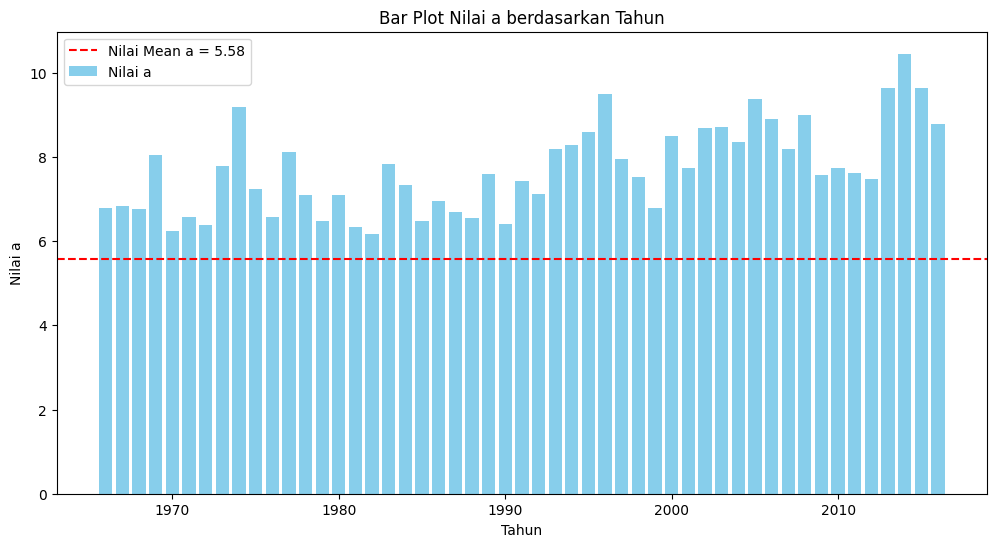

In [45]:
import matplotlib.pyplot as plt

# Filter data untuk tahun 1966 - 2016
filtered_data = fixkolom[(fixkolom['year'] >= 1966) & (fixkolom['year'] <= 2016)]

# Hitung nilai mean dari b-value
mean_a_value = filtered_data['a-value'].mean()

# Plot bar plot
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['year'], filtered_data['a-value'], color='skyblue', label='Nilai a')
plt.axhline(y=mean_a_value, color='red', linestyle='--', label=f'Nilai Mean a = {mean_a_value:.2f}')
plt.xlabel('Tahun')
plt.ylabel('Nilai a')
plt.title('Bar Plot Nilai a berdasarkan Tahun')
plt.legend()
plt.show()
